In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the data (csv file)
url=r"/content/ShartankIndiaAllPitches.csv"
df=pd.read_csv(url)
df.head()

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1


In [ ]:
print("Column Data Types and Non-Null Counts:")
print(df.info())

Column Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Episode Number                     117 non-null    int64 
 1   Pitch Number                       117 non-null    int64 
 2   Brand                              117 non-null    object
 3   Idea                               117 non-null    object
 4   Investment Amount (In Lakhs INR)   117 non-null    int64 
 5   Debt (In lakhs INR)                117 non-null    int64 
 6   Equity                             117 non-null    object
 7   Anupam                             117 non-null    object
 8   Ashneer                            117 non-null    object
 9   Namita                             117 non-null    object
 10  Aman                               117 non-null    object
 11  Peyush                          

In [ ]:
#Convert the Equity column to float
df['Equity_Cleaned']=df['Equity'].astype(str).str.replace('%', '', regex=False).replace(r'[^0-9\.]', '0', regex=True).astype(float)
#Create the binary Deal column
df['Deal']=np.where(df['Investment Amount (In Lakhs INR) '] > 0, 1, 0)
#Calculate the Post-Money Valuation for successful deals
#Formula:(Investment Amount/Equity%)*100
df['Deal_Valuation (In Lakhs INR)']=np.where(
    df['Investment Amount (In Lakhs INR) ']>0,
    (df['Investment Amount (In Lakhs INR) ']/df['Equity_Cleaned'])*100,
    0
)

In [ ]:
print(df.columns)

Index(['Episode Number', 'Pitch Number', 'Brand', 'Idea',
       'Investment Amount (In Lakhs INR) ', 'Debt (In lakhs INR)', 'Equity',
       'Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal',
       'Season', 'Equity_Cleaned', 'Deal', 'Deal_Valuation (In Lakhs INR)'],
      dtype='object')


In [ ]:
print(df[['Brand', 'Investment Amount (In Lakhs INR) ', 'Equity', 'Equity_Cleaned', 'Deal', 'Deal_Valuation (In Lakhs INR)']].head().to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))

| Brand               | Investment Amount (In Lakhs INR)    | Equity   | Equity_Cleaned   | Deal   | Deal_Valuation (In Lakhs INR)   |
|:--------------------|:------------------------------------|:---------|:-----------------|:-------|:--------------------------------|
| BluePine Industries | 75                                  | 18%      | 18.00            | 1      | 416.67                          |
| Booz scooters       | 40                                  | 50%      | 50.00            | 1      | 80.00                           |
| Heart up my Sleeves | 25                                  | 30%      | 30.00            | 1      | 83.33                           |
| Tagz Foods          | 70                                  | 2.75%    | 2.75             | 1      | 2545.45                         |
| Head and Heart      | 0                                   | 0        | 0.00             | 0      | 0.00                            |


In [ ]:
domain_analysis = df.groupby('Idea').agg(
    Total_Pitches=('Idea', 'size'),
    Successful_Deals=('Deal', 'sum'),
    Total_Investment=('Investment Amount (In Lakhs INR) ', 'sum'),
    Average_Deal_Valuation=('Deal_Valuation (In Lakhs INR)', lambda x: x[x > 0].mean())
).reset_index()
#Calculating the Success Rate
domain_analysis['Success_Rate (%)']=(domain_analysis['Successful_Deals'] / domain_analysis['Total_Pitches']) * 100

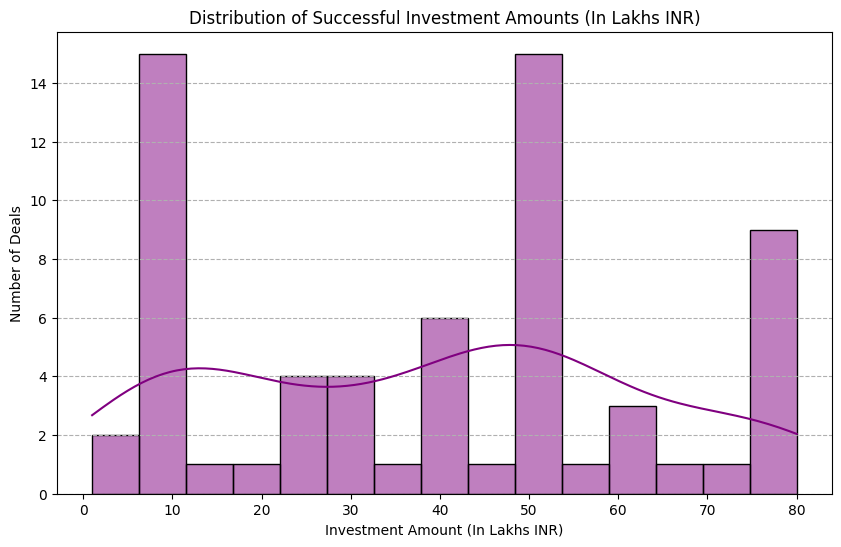

In [ ]:
#Visualization of the distribution of successful deal amounts
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Deal']==1]['Investment Amount (In Lakhs INR) '], bins=15, kde=True, color='purple')
plt.title('Distribution of Successful Investment Amounts (In Lakhs INR)')
plt.xlabel('Investment Amount (In Lakhs INR)')
plt.ylabel('Number of Deals')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
shark_columns=['Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal']
#Total number of deals made by each Shark
shark_deals_counts={}
for shark in shark_columns:
    shark_deals_counts[shark]=df[shark].value_counts().get('Y', 0)

shark_deals_df = pd.DataFrame(list(shark_deals_counts.items()), columns=['Shark', 'Total Deals Made'])
#Average investment amount per Shark
df['Total Sharks in Deal'] = df[shark_columns].apply(lambda x: (x=='Y').sum(), axis=1)
# Amount each shark contributed (Investment Amount / Total Sharks in Deal)
df['Estimated Amount Per Shark']=np.where(
    df['Total Sharks in Deal']>0,
    df['Investment Amount (In Lakhs INR) ']/df['Total Sharks in Deal'],
    0
)
#Reshaping the data
shark_investments = df[df['Estimated Amount Per Shark'] > 0].melt(
    id_vars=['Estimated Amount Per Shark'],
    value_vars=shark_columns,
    var_name='Shark',
    value_name='Investment_Decision'
)
#Rows where the shark invested ('Y')
shark_investments_made=shark_investments[shark_investments['Investment_Decision'] == 'Y']
#Aggregate the average estimated amount for each shark
shark_investment_avg=shark_investments_made.groupby('Shark')['Estimated Amount Per Shark'].mean().reset_index()
shark_investment_avg.columns=['Shark', 'Average Investment (Lakhs INR)']
# Merge them
shark_summary=pd.merge(shark_deals_df, shark_investment_avg, on='Shark', how='left')
shark_summary=shark_summary.sort_values(by='Total Deals Made', ascending=False)
shark_summary['Average Investment (Lakhs INR)']=shark_summary['Average Investment (Lakhs INR)'].round(2)
shark_summary.fillna(0, inplace=True)
print("\nShark Investment Frequency and Average Commitment:")
print(shark_summary.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))


Shark Investment Frequency and Average Commitment:
| Shark   | Total Deals Made   | Average Investment (Lakhs INR)   |
|:--------|:-------------------|:---------------------------------|
| Aman    | 28                 | 20.56                            |
| Peyush  | 27                 | 17.30                            |
| Anupam  | 24                 | 16.03                            |
| Namita  | 22                 | 21.67                            |
| Ashneer | 21                 | 15.04                            |
| Vineeta | 15                 | 15.49                            |
| Ghazal  | 7                  | 12.07                            |


/tmp/ipython-input-2584754223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shark', y='Total Deals Made', data=shark_summary, palette='tab10')


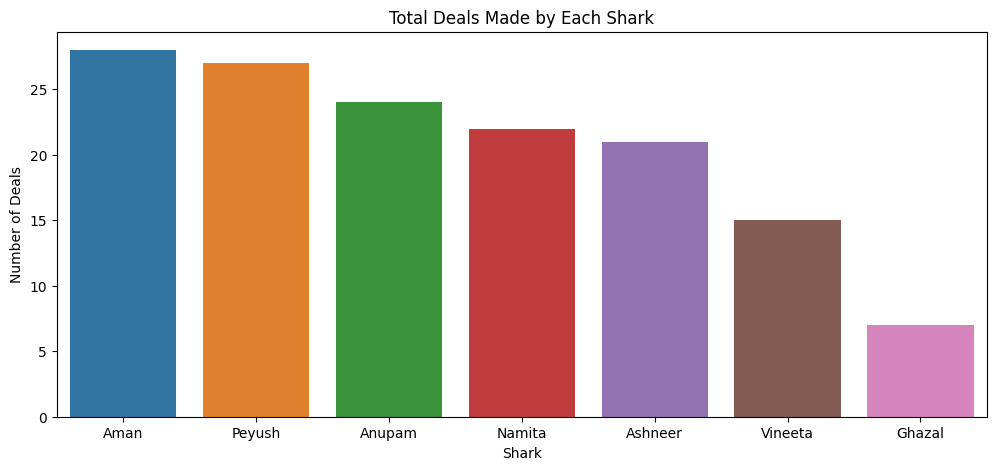

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Shark', y='Total Deals Made', data=shark_summary, palette='tab10')
plt.title('Total Deals Made by Each Shark')
plt.xlabel('Shark')
plt.ylabel('Number of Deals')
plt.show()